# BIG DATA SALES PREDICTION

We have Bigmart data of 2013 sales for 1559 products across 10 stores in different cities. 

## Dataset
- Item_Identifier ----- Unique product ID
- Item_Weight ---- Weight of product
- Item_Fat_Content ----- Whether the product is low fat or not
- Item_Visibility ---- The % of the total display area of all products in a store allocated to the particular product
- Item_Type ---- The category to which the product belongs
- Item_MRP ----- Maximum Retail Price (list price) of the product
- Outlet_Identifier ----- Unique store ID
- Outlet_Establishment_Year ----- The year in which store store was established
- Outlet_Size ----- The size of the store in terms of ground area covered
- Outlet_Location_Type ---- The type of city in which the store is located
- Outlet_Type ---- whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales ---- sales of the product in t particular store. This is the outcome variable to be predicted.

### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Loading and Analysing Data

In [2]:
bigdata_df = pd.read_csv('train.csv')

In [3]:
bigdata_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
bigdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
bigdata_df.shape

(8523, 12)

### Any missing Values

In [6]:
import missingno as msno

<Axes: >

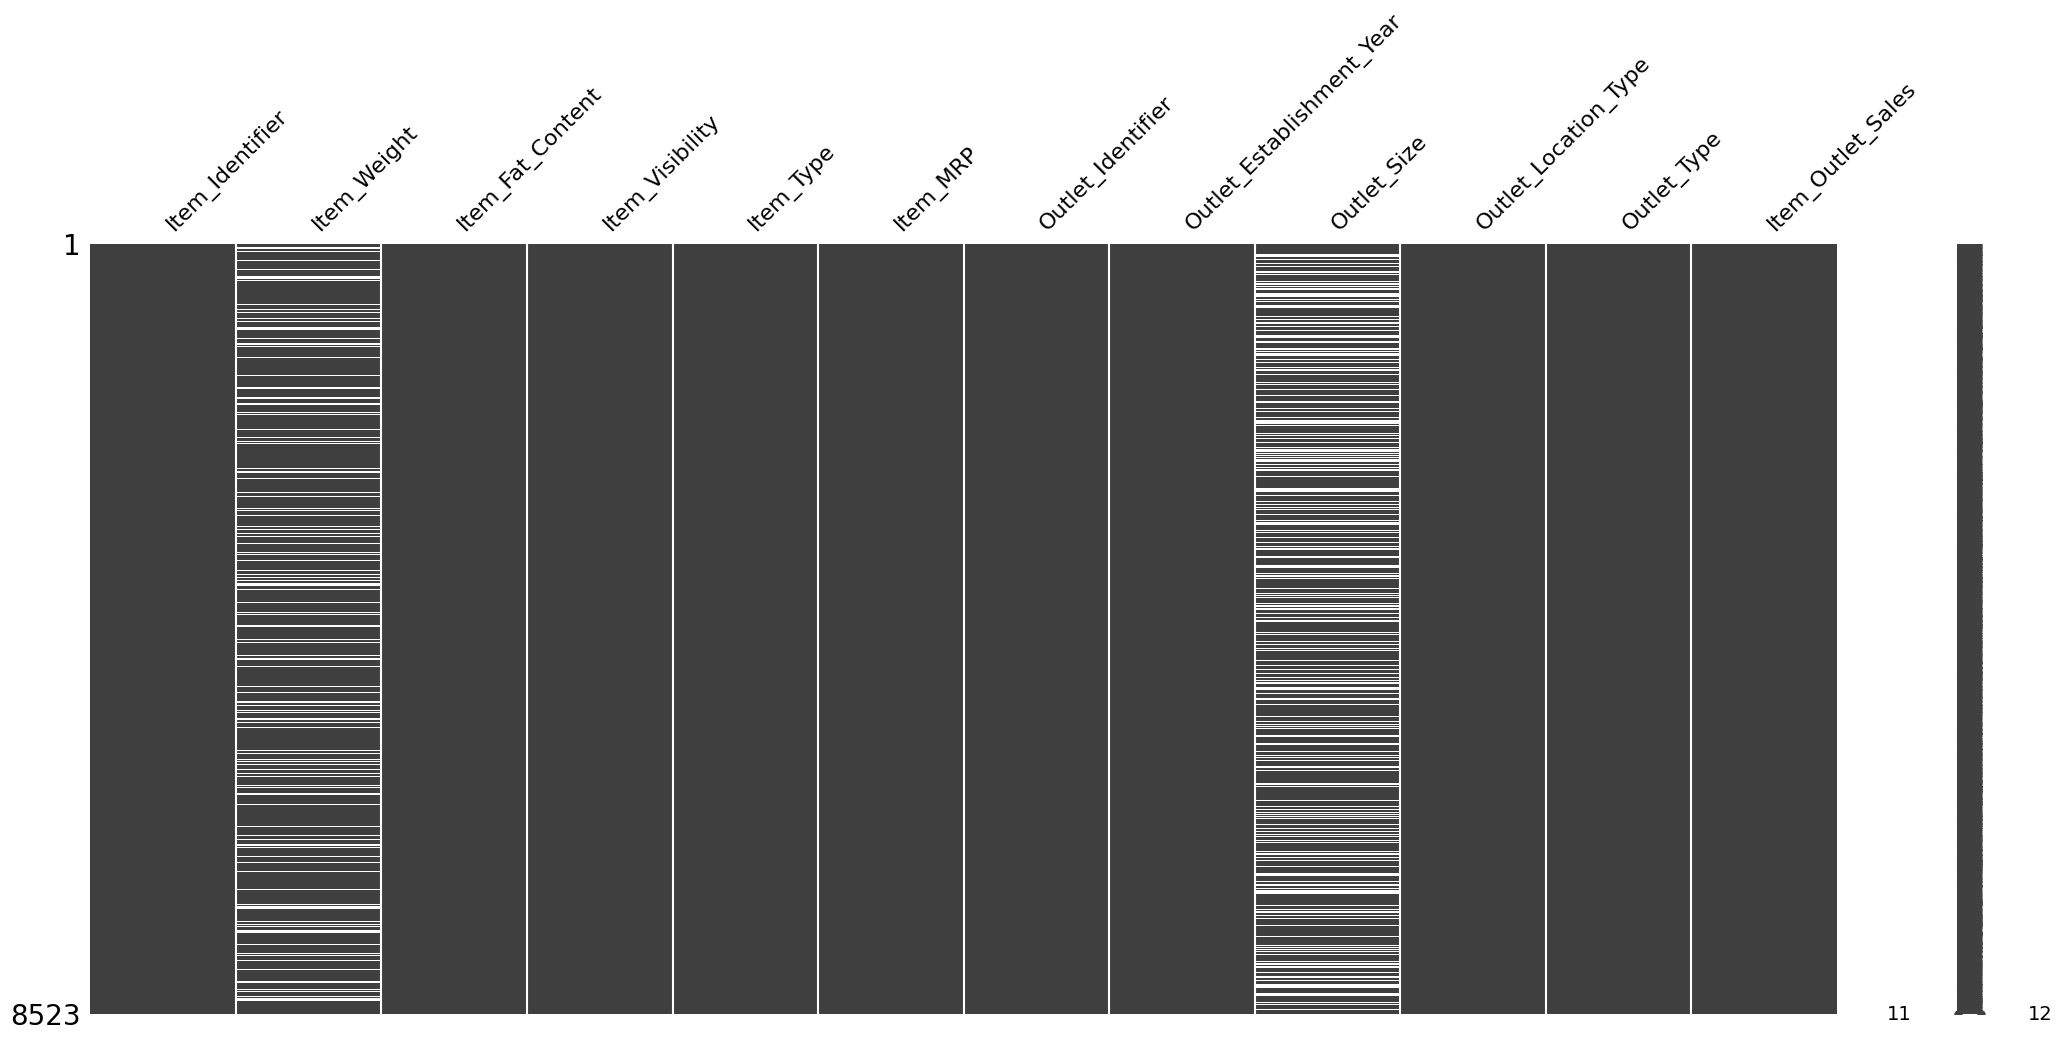

In [7]:
msno.matrix(bigdata_df)

In [8]:
bigdata_df.isnull().sum()                         # for sum
#bigdata_df.isnull().sum()/8523*100                # for percent

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Item Weight** and **outlet size** has missing Values
To deal with missing values we will use **Data Imputation Technique** 
- Item_weight is numerical variable so we will fill the null values by its **Mean** (average value of item_weight)
- Outlet_size is a categorical variable so we will fill the null values by its **Mode** (Most repeative outlet_size)

In [9]:
bigdata_df.Item_Weight.mean()

12.857645184135976

In [10]:
bigdata_df['Item_Weight'].fillna(bigdata_df['Item_Weight'].mean(), inplace= True)

Replacing the values of Outlet_size by its Mode

In [11]:
bigdata_df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x:x.mode()[0]))


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [12]:
#bigdata_df.Outlet_Type.value_counts()
bigdata_df.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [13]:
bigdata_df['Outlet_Size'].fillna(('Medium'), inplace= True)

In [14]:
bigdata_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [15]:
bigdata_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Data Analysis

#### Categorical Features
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size                
- Outlet_Location_Type       
- Outlet_Type 

#### Numerical Features
- Item_Weight
- Item_Visibility
- Item_MRP 
- Outlet_Establishment_Year
- Item_Outlet_Sales

In [16]:
bigdata_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
sn.set()

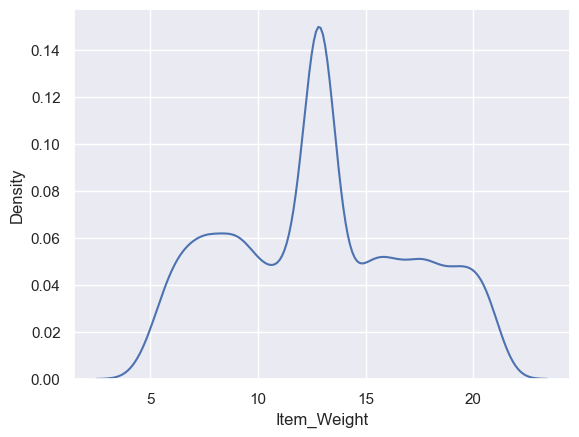

In [18]:
# plot for Item_Weight
plt.Figure(figsize=(6, 3))
sn.kdeplot(bigdata_df['Item_Weight'])
plt.show();

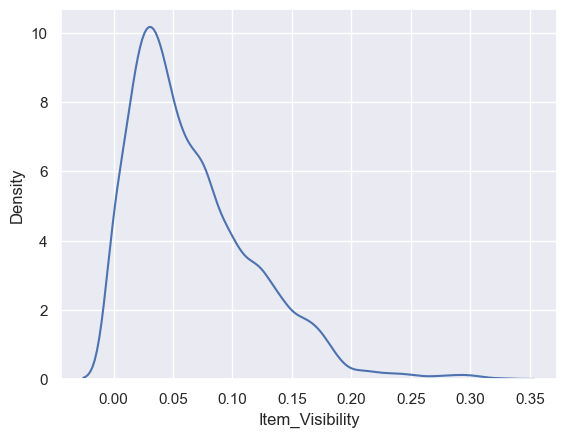

In [19]:
# Plot for Item_Visiility
plt.Figure(figsize=(6, 3))
sn.kdeplot(bigdata_df['Item_Visibility'])
plt.show();

C:\Users\ATHARVA\AppData\Local\Temp\ipykernel_18064\3480542415.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(bigdata_df['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

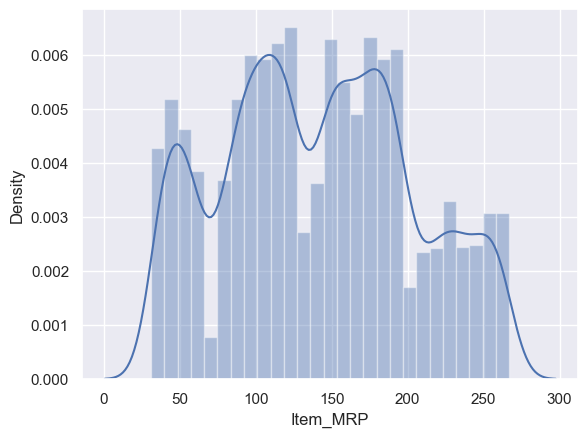

In [20]:
# Plot for Item_MRP
plt.Figure(figsize=(6,3))
sn.distplot(bigdata_df['Item_MRP'])

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

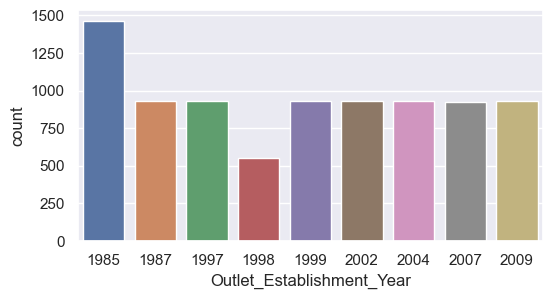

In [21]:
# plot for Outlet_Establishment_Year
plt.figure(figsize=(6,3))
sn.countplot(data = bigdata_df,
             x = 'Outlet_Establishment_Year')

C:\Users\ATHARVA\AppData\Local\Temp\ipykernel_18064\1273498480.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(bigdata_df['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

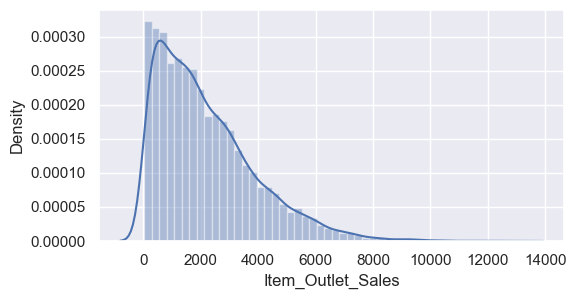

In [22]:
# plot for Item_Outlet_Sales
plt.figure(figsize=(6,3))
sn.distplot(bigdata_df['Item_Outlet_Sales'])

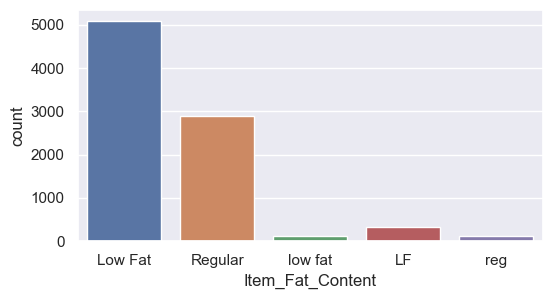

In [23]:
# plot for Item_Fat_Content
plt.figure(figsize=(6,3))
sn.countplot(data= bigdata_df,
             x= 'Item_Fat_Content');

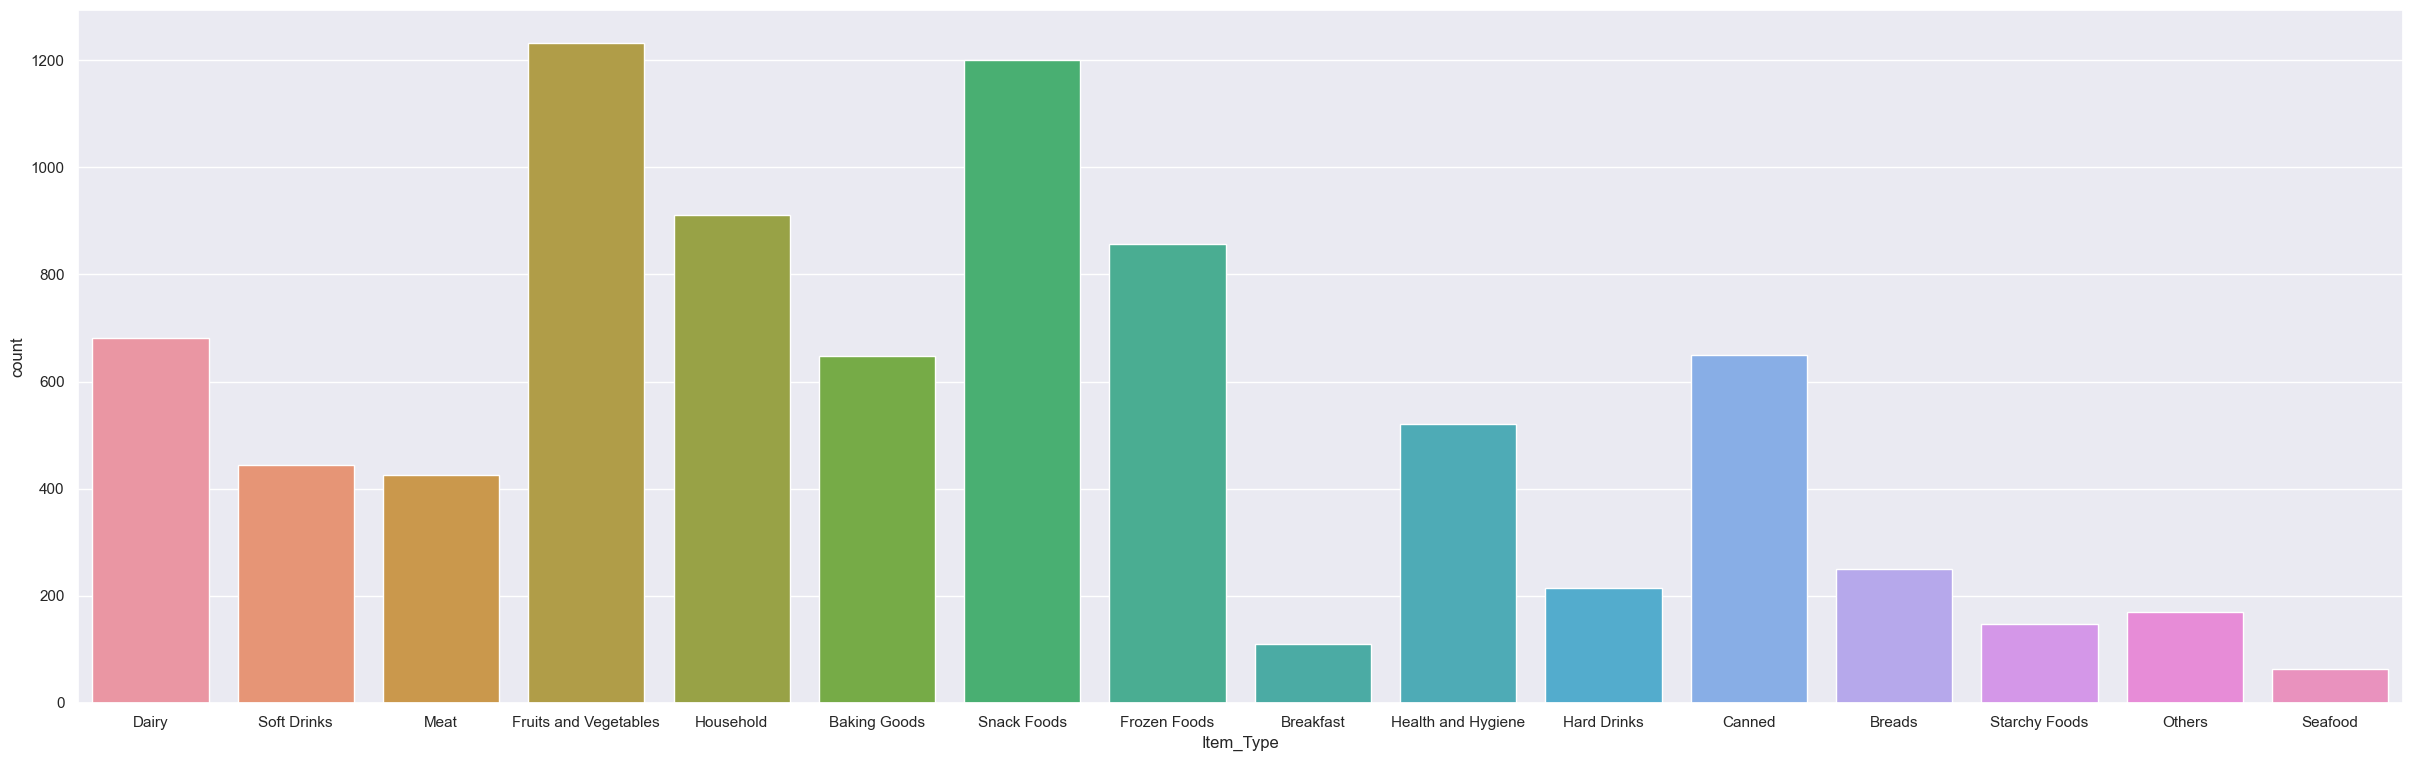

In [24]:
# plot for Item_Type
plt.figure(figsize=(30,9))
sn.countplot(data= bigdata_df,
             x= 'Item_Type');

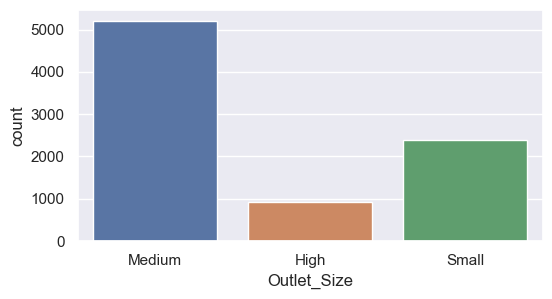

In [25]:
# plot for Outlet_Size
plt.figure(figsize=(6,3))
sn.countplot(data= bigdata_df,
             x= 'Outlet_Size');

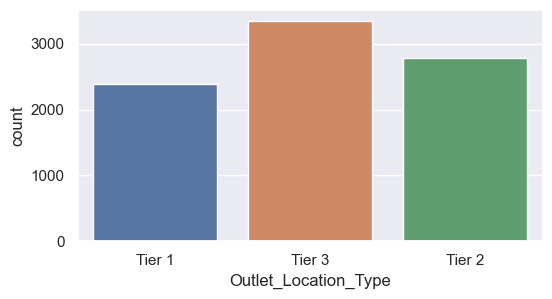

In [26]:
# plot for Outlet_Location_Type
plt.figure(figsize=(6,3))
sn.countplot(data= bigdata_df,
             x= 'Outlet_Location_Type');

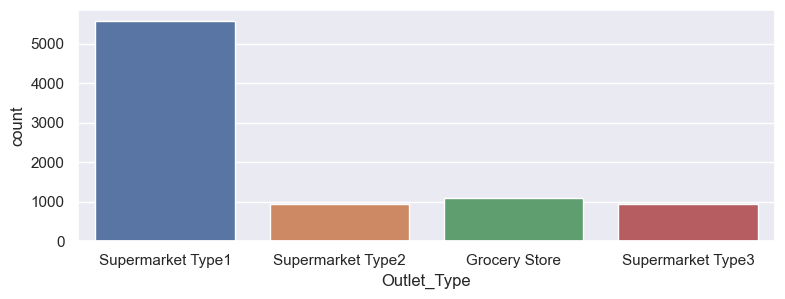

In [27]:
# plot for Outlet_Type
plt.figure(figsize=(9,3))
sn.countplot(data= bigdata_df,
             x= 'Outlet_Type');

### Data Pre Processing

In [28]:
bigdata_df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [29]:
bigdata_df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [30]:
bigdata_df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

#### Feature Set Selection

In [31]:
x_features =['Item_Identifier',
            'Item_Fat_Content',
            'Item_Type',
            'Outlet_Identifier',
            'Outlet_Size',                
            'Outlet_Location_Type'  ,     
            'Outlet_Type' ,
            'Item_Weight',
            'Item_Visibility',
            'Item_MRP', 
            'Outlet_Establishment_Year']


In [32]:
# Categorical Features
cat_vars = ['Item_Identifier',
            'Item_Fat_Content',
            'Item_Type',
            'Outlet_Identifier',
            'Outlet_Size',                
            'Outlet_Location_Type'  ,     
            'Outlet_Type' ]


In [33]:
num_vars = list(set(x_features)- set(cat_vars))

num_vars

['Item_Weight', 'Outlet_Establishment_Year', 'Item_Visibility', 'Item_MRP']

### Need for Data Transformation

1. Categorical columns
    - OHE Encoding
2. Numerical Columns
    - No Transformation Required

- Setting X and y variables

In [34]:
X = bigdata_df[x_features]
y = bigdata_df['Item_Outlet_Sales']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size= 0.8,
                                                    random_state = 80)

In [37]:
X_train.shape,y_train.shape,X_test.shape

((6818, 11), (6818,), (1705, 11))

#### Creating Pipelines

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [39]:
ohe = OneHotEncoder(handle_unknown= 'ignore')

In [40]:
cat_transform = Pipeline(steps=[('onehorencoder', ohe)])

In [41]:
preprocesser = ColumnTransformer(
    transformers=[('numericals',"passthrough", num_vars),
                  ('categorical',cat_transform,cat_vars)]
)

### XGBoost Regression Model

In [42]:
from xgboost import XGBRegressor

In [43]:
lreg = XGBRegressor()

In [44]:
lreg_pipeline = Pipeline(steps=[('preprocessing',preprocesser),
                                ('regressor', lreg)])

In [45]:
lreg_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numericals', 'passthrough',
                                                  ['Item_Weight',
                                                   'Outlet_Establishment_Year',
                                                   'Item_Visibility',
                                                   'Item_MRP']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehorencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Item_Identifier',
                                                   'Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_L...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

### Predict on Test data

In [46]:
from sklearn.metrics import r2_score

In [47]:
y_pred_test = lreg_pipeline.predict(X_test)

In [48]:
r2_score(y_test,y_pred_test)

0.5731569143617158

### Predictting on test Data (Given)

In [49]:
test_data = pd.read_csv('test.csv')

In [50]:
outlet_sale = lreg_pipeline.predict(test_data)

In [51]:
pd.DataFrame(outlet_sale)[:5]

,0
0,1496.649658
1,1331.791626
2,1060.609253
3,2538.552490
4,5597.240723


### Saving the Prediction in Excel Formatt

In [52]:
Big_Mart = pd.DataFrame({
    'Item_Identifier': test_data['Item_Identifier'],
    'Outlet_Identifier': test_data['Outlet_Identifier'],
    'Item_Outlet_Sales': outlet_sale
}, columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [53]:
Big_Mart.to_csv('Big_Mart_Sales.csv', index = False)